# Analyse par classification des PLM et de l'expression de leur gene

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mise en place des données et séparation entre expression negative et positive

In [150]:
complete_data = pd.read_csv("data/expression_final.csv", index_col=0)
print(complete_data)

            1101  1104   29   30  1977  1973  1980  1976  1978  1974  ...  \
Unnamed: 0                                                            ...   
AT1G01010    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01030    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01040    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01050    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT1G01060    0.0   0.0  1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...          ...   ...  ...  ...   ...   ...   ...   ...   ...   ...  ...   
AT5G67550    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT5G67560    0.0   0.0  0.0 -1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT5G67590    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0   0.0  ...   
AT5G67620    0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
AT5G67630    0.0   0.0  0.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

In [151]:
Info_allswap = pd.read_table("data/Info-allswap.txt")
Info_allswap["uniq_name"] = Info_allswap[['StressName', 'swap_name']].agg('__'.join, axis=1)

replace_col = {str(k): Info_allswap[Info_allswap["swap_id"] == k]["uniq_name"].values.tolist()[0] for k in Info_allswap["swap_id"]}

complete_data = complete_data.rename(replace_col, axis=1)

In [152]:
plus_data = np.where(complete_data == 1, True, False)
plus_data = pd.DataFrame(plus_data, index=complete_data.index, columns=complete_data.columns)
print(plus_data)

            DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1  \
Unnamed: 0                                                       
AT1G01010                                               False    
AT1G01030                                               False    
AT1G01040                                               False    
AT1G01050                                               False    
AT1G01060                                               False    
...                                                       ...    
AT5G67550                                               False    
AT5G67560                                               False    
AT5G67590                                               False    
AT5G67620                                               False    
AT5G67630                                               False    

            DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2  \
Unnamed: 0                                                       
AT1G01010

In [153]:
minus_data = np.where(complete_data == -1, True, False)
minus_data = pd.DataFrame(minus_data, index=complete_data.index, columns=complete_data.columns)
print(minus_data)

            DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1  \
Unnamed: 0                                                       
AT1G01010                                               False    
AT1G01030                                               False    
AT1G01040                                               False    
AT1G01050                                               False    
AT1G01060                                               False    
...                                                       ...    
AT5G67550                                               False    
AT5G67560                                               False    
AT5G67590                                               False    
AT5G67620                                               False    
AT5G67630                                               False    

            DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2  \
Unnamed: 0                                                       
AT1G01010

### Nombre de PLM par gene et combinaison de gene

In [154]:
PLM_final = pd.read_csv("data/PLM_final.csv", index_col=0)

PLM_final = pd.DataFrame(np.where(PLM_final == 1, True, False), index=PLM_final.index, columns=PLM_final.columns)

PLM_final

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01030,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67550,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
AT5G67560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
AT5G67590,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
AT5G67620,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True


In [155]:
motif_plus_cond_data = {i:{k: 0 for k in PLM_final.columns.tolist()} for i in plus_data.columns.to_list()}
motif_minus_cond_data = {i:{k: 0 for k in PLM_final.columns.tolist()} for i in minus_data.columns.to_list()}

In [156]:
motif_plus_cond_data = {i:{k: 0 for k in PLM_final.columns.tolist()} for i in plus_data.columns.to_list()}
motif_minus_cond_data = {i:{k: 0 for k in PLM_final.columns.tolist()} for i in minus_data.columns.to_list()}
PLM_final_t = PLM_final.T

In [157]:
i=0
for cond in plus_data.columns:
    gene_x = plus_data[cond][plus_data[cond]].index.to_list()
    i +=1
    print(i, " / ", len(plus_data.columns))
    for gene in gene_x:
        plm_x = PLM_final_t[gene][PLM_final_t[gene]].index
        for plm in plm_x:
            motif_plus_cond_data[cond][plm] += 1

1  /  387
2  /  387
3  /  387


4  /  387
5  /  387
6  /  387
7  /  387
8  /  387
9  /  387
10  /  387
11  /  387
12  /  387
13  /  387
14  /  387
15  /  387
16  /  387
17  /  387
18  /  387
19  /  387
20  /  387
21  /  387
22  /  387
23  /  387
24  /  387
25  /  387
26  /  387
27  /  387
28  /  387
29  /  387
30  /  387
31  /  387
32  /  387
33  /  387
34  /  387
35  /  387
36  /  387
37  /  387
38  /  387
39  /  387
40  /  387
41  /  387
42  /  387
43  /  387
44  /  387
45  /  387
46  /  387
47  /  387
48  /  387
49  /  387
50  /  387
51  /  387
52  /  387
53  /  387
54  /  387
55  /  387
56  /  387
57  /  387
58  /  387
59  /  387
60  /  387
61  /  387
62  /  387
63  /  387
64  /  387
65  /  387
66  /  387
67  /  387
68  /  387
69  /  387
70  /  387
71  /  387
72  /  387
73  /  387
74  /  387
75  /  387
76  /  387
77  /  387
78  /  387
79  /  387
80  /  387
81  /  387
82  /  387
83  /  387
84  /  387
85  /  387
86  /  387
87  /  387
88  /  387
89  /  387
90  /  387
91  /  387
92  /  387
93  /  387
94  /  387
95  /

In [158]:
i=0
for cond in minus_data.columns:
    gene_x = minus_data[cond][minus_data[cond]].index.to_list()
    i +=1
    print(i, " / ", len(minus_data.columns))
    for gene in gene_x:
        plm_x = PLM_final_t[gene][PLM_final_t[gene]].index
        for plm in plm_x:
            motif_minus_cond_data[cond][plm] += 1

1  /  387
2  /  387
3  /  387
4  /  387
5  /  387
6  /  387
7  /  387
8  /  387
9  /  387
10  /  387
11  /  387
12  /  387
13  /  387
14  /  387
15  /  387
16  /  387
17  /  387
18  /  387
19  /  387
20  /  387
21  /  387
22  /  387
23  /  387
24  /  387
25  /  387
26  /  387
27  /  387
28  /  387
29  /  387
30  /  387
31  /  387
32  /  387
33  /  387
34  /  387
35  /  387
36  /  387
37  /  387
38  /  387
39  /  387
40  /  387
41  /  387
42  /  387
43  /  387
44  /  387
45  /  387
46  /  387
47  /  387
48  /  387
49  /  387
50  /  387
51  /  387
52  /  387
53  /  387
54  /  387
55  /  387
56  /  387
57  /  387
58  /  387
59  /  387
60  /  387
61  /  387
62  /  387
63  /  387
64  /  387
65  /  387
66  /  387
67  /  387
68  /  387
69  /  387
70  /  387
71  /  387
72  /  387
73  /  387
74  /  387
75  /  387
76  /  387
77  /  387
78  /  387
79  /  387
80  /  387
81  /  387
82  /  387
83  /  387
84  /  387
85  /  387
86  /  387
87  /  387
88  /  387
89  /  387
90  /  387
91  /  387
92  /  3

In [159]:
motif_plus_cond_data = pd.DataFrame(motif_plus_cond_data).T
motif_plus_cond_data

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,0,0,0,0,1,0,3,2,0,65,...,11,0,0,2,7,0,3,3,41,15
DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,0,0,0,1,5,0,2,2,0,62,...,11,0,0,2,11,0,5,6,29,14
DROUGHT__Col0_stress / Col0,0,0,2,2,14,3,22,31,6,360,...,59,1,2,9,67,1,24,36,192,97
DROUGHT__35S_HAHB4_stress / 35S_HAHB4,0,0,6,9,29,1,43,50,7,610,...,101,2,2,12,103,3,41,82,355,191
DROUGHT__Col0_M_1 / Col0_control_1,0,0,2,8,28,2,43,42,5,649,...,121,1,2,15,133,4,55,79,342,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,0,0,2,8,23,0,30,51,1,609,...,123,2,1,13,140,1,70,82,324,200
VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,0,0,2,5,16,0,31,28,2,389,...,81,0,2,13,102,1,52,52,216,103
VIRUS__TCV_G1_Col0_2 / G1_Col0_2,0,0,3,7,34,0,60,46,5,729,...,135,1,2,17,154,4,56,92,360,184
VIRUS__TCV_G11_Col0_1 / G11_Col0_1,2,0,0,5,17,0,28,24,5,417,...,85,2,0,7,85,1,41,63,220,121


In [160]:
motif_minus_cond_data = pd.DataFrame(motif_minus_cond_data).T
motif_minus_cond_data

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,0,0,0,0,1,0,1,3,0,31,...,5,0,0,0,5,0,4,3,15,7
DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,0,0,0,0,1,0,0,0,1,20,...,1,0,0,0,1,0,0,3,10,2
DROUGHT__Col0_stress / Col0,1,2,4,8,18,1,28,31,5,517,...,95,0,1,13,89,3,52,62,271,152
DROUGHT__35S_HAHB4_stress / 35S_HAHB4,2,1,4,7,25,1,39,39,3,587,...,113,0,3,7,115,1,58,64,311,171
DROUGHT__Col0_M_1 / Col0_control_1,0,0,3,6,23,0,27,32,4,513,...,82,1,4,14,77,2,38,77,302,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,0,0,2,8,24,3,41,37,3,507,...,87,0,1,14,81,2,33,51,277,148
VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,0,0,0,4,7,0,25,29,6,367,...,71,0,1,13,48,2,22,61,234,123
VIRUS__TCV_G1_Col0_2 / G1_Col0_2,1,0,6,11,36,0,56,54,8,821,...,106,0,3,19,110,2,48,99,447,246
VIRUS__TCV_G11_Col0_1 / G11_Col0_1,0,0,3,7,32,2,35,37,4,574,...,84,1,3,14,94,3,29,74,288,177


Reunion 10/01/2025 :
- Diviser le nombre de fois vue le plm par gene et par condition par diviser par le nombre de fois total qu'on a vu dans toute la population de gene
- Faire une recherche de motif fréquent en faisant un threshold choisis sur la fréquence

In [161]:
sum_PLM_gene = np.sum(PLM_final, 0)

motif_minus_cond_freq = motif_minus_cond_data / sum_PLM_gene
motif_plus_cond_freq = motif_plus_cond_data / sum_PLM_gene

In [162]:
motif_plus_cond_freq

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,0.000000,0.0,0.00,0.000000,0.002755,0.000000,0.005859,0.003257,0.000000,0.008387,...,0.007919,0.000000,0.000000,0.011494,0.004868,0.000000,0.005042,0.003233,0.009964,0.006793
DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,0.000000,0.0,0.00,0.010417,0.013774,0.000000,0.003906,0.003257,0.000000,0.008000,...,0.007919,0.000000,0.000000,0.011494,0.007650,0.000000,0.008403,0.006466,0.007047,0.006341
DROUGHT__Col0_stress / Col0,0.000000,0.0,0.08,0.020833,0.038567,0.333333,0.042969,0.050489,0.115385,0.046452,...,0.042477,0.090909,0.055556,0.051724,0.046592,0.038462,0.040336,0.038793,0.046659,0.043931
DROUGHT__35S_HAHB4_stress / 35S_HAHB4,0.000000,0.0,0.24,0.093750,0.079890,0.111111,0.083984,0.081433,0.134615,0.078710,...,0.072714,0.181818,0.055556,0.068966,0.071627,0.115385,0.068908,0.088362,0.086270,0.086504
DROUGHT__Col0_M_1 / Col0_control_1,0.000000,0.0,0.08,0.083333,0.077135,0.222222,0.083984,0.068404,0.096154,0.083742,...,0.087113,0.090909,0.055556,0.086207,0.092490,0.153846,0.092437,0.085129,0.083111,0.075181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,0.000000,0.0,0.08,0.083333,0.063361,0.000000,0.058594,0.083062,0.019231,0.078581,...,0.088553,0.181818,0.027778,0.074713,0.097357,0.038462,0.117647,0.088362,0.078736,0.090580
VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,0.000000,0.0,0.08,0.052083,0.044077,0.000000,0.060547,0.045603,0.038462,0.050194,...,0.058315,0.000000,0.055556,0.074713,0.070932,0.038462,0.087395,0.056034,0.052491,0.046649
VIRUS__TCV_G1_Col0_2 / G1_Col0_2,0.000000,0.0,0.12,0.072917,0.093664,0.000000,0.117188,0.074919,0.096154,0.094065,...,0.097192,0.090909,0.055556,0.097701,0.107093,0.153846,0.094118,0.099138,0.087485,0.083333
VIRUS__TCV_G11_Col0_1 / G11_Col0_1,0.222222,0.0,0.00,0.052083,0.046832,0.000000,0.054688,0.039088,0.096154,0.053806,...,0.061195,0.181818,0.000000,0.040230,0.059110,0.038462,0.068908,0.067888,0.053463,0.054801


Parcours des table au dessus pour voir les valeurs que l'on a afin de préparer la recherche de motif

## Mise en place d'une recherche par motif

In [163]:
from mlxtend.frequent_patterns import fpgrowth

In [164]:
pd.DataFrame(np.array([motif_plus_cond_freq.apply(np.mean),motif_plus_cond_freq.apply(np.std)]), )

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.022107,0.017571,0.042997,0.037172,0.034944,0.047373,0.036610,0.030827,0.050487,0.035241,...,0.033874,0.032182,0.037468,0.033488,0.034855,0.046015,0.036645,0.036950,0.035319,0.035285
1,0.052887,0.060157,0.057612,0.041925,0.037564,0.077164,0.038883,0.034900,0.055201,0.036870,...,0.036747,0.066085,0.045840,0.038991,0.037620,0.060104,0.041137,0.038605,0.037285,0.038316


On va d'abord observer le nombre de True que l'on obtiens selon le treshhold choisis.

In [165]:
nb_True_cond = []
nb_True_plm = []
tresh_list = [i/100 for i in range(0,101,1)]

for n in tresh_list:
    data = motif_plus_cond_freq > n
    nb_True_cond.append(np.sum(np.sum(data, 1)))
    nb_True_plm.append(np.sum(np.sum(data,0)))

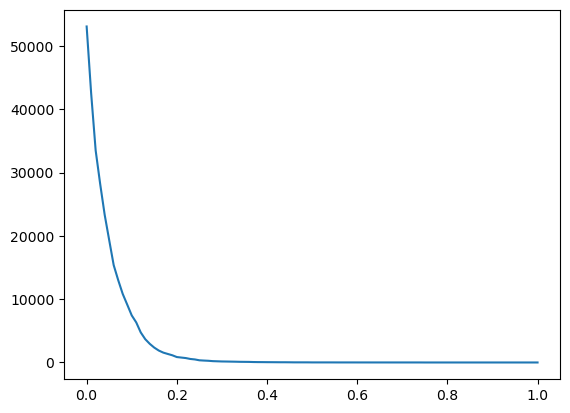

                  0
count    101.000000
mean    2850.445545
std     8604.044353
min        0.000000
25%        0.000000
50%       11.000000
75%      345.000000
max    53077.000000


In [166]:
plt.figure()
plt.plot(tresh_list,nb_True_plm)
plt.show()

print(pd.DataFrame(nb_True_plm).describe())

In [167]:
nb_True_cond = []
nb_True_plm = []
tresh_list = [i/100 for i in range(0,101,1)]

for n in tresh_list:
    data = motif_minus_cond_freq > n
    nb_True_cond.append(np.sum(np.sum(data, 1)))
    nb_True_plm.append(np.sum(np.sum(data,0)))

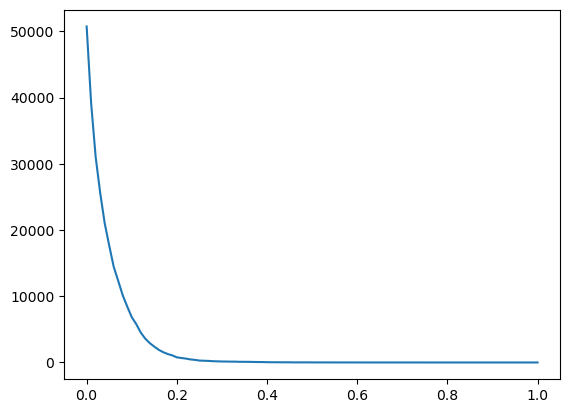

                  0
count    101.000000
mean    2652.623762
std     8026.223787
min        0.000000
25%        0.000000
50%        9.000000
75%      289.000000
max    50732.000000


In [168]:
plt.figure()
plt.plot(tresh_list,nb_True_plm)
plt.show()

print(pd.DataFrame(nb_True_plm).describe())

Adaptation de l'algo FP growth pour notre problématique

In [169]:
def fpgrowth_2(data, min_support,tresh, max_length = None):
    data = data > tresh
    return fpgrowth(data, min_support=min_support, max_len = max_length, use_colnames=True)

In [170]:
# Tresh = Plus c'est haut, plus le seuil de fréquence est exigeant, moins il y a de valeurs
# min_support = Plus c'est bas, plus la fréquence des pattern pris en compte est basse 

fpgrowth_2(motif_plus_cond_freq, min_support=0.5, tresh = 0.1)

,support,itemsets


In [171]:
res = fpgrowth_2(motif_plus_cond_freq, min_support=0.0001, tresh = 0.0, max_length=1).sort_values(by = 'support', ascending = False)
res

,support,itemsets
0,0.987080,(AAAGYV_-116)
5,0.987080,(TGACG_171)
8,0.987080,(GATT_272)
7,0.987080,(TTATTT_-134)
6,0.987080,(GRWAAW_-212)
...,...,...
175,0.170543,(WMCAATAATTRW_-317)
176,0.139535,(AADRGAATMTTYTT_-102)
173,0.134367,(KGTCCCAT_-93)
174,0.082687,(TGTAAAGT_-280)


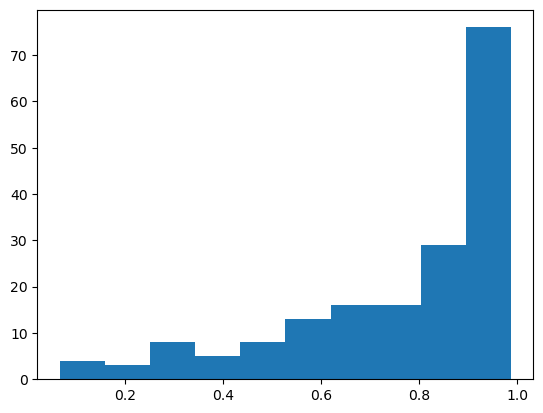

In [172]:
plt.figure()
plt.hist(res["support"])
plt.show()

En essayant l'algorithme on voit qu'il renvoie soit aucun motifs soit il prend beaucoup de temps à se finir (+ de 10 minute). Cela est clairement due au grand nombre de motifs a faible support et au valeur peu uniformément répartie dans les données.

On va donc :
- Ne prendre en compte que les motifs de taille 1
- Utiliser seulement les PLM les plus important (déterminer par clustering) pour faire les analyses

### Motifs de taille 1

#### Pour les expression positives

On regarde, pour chaque Treshhold de pourcentage d'apparission du plm, combien de motifs (dont le support n'est pas égale a 0) on retrouve.

In [173]:
tresh_result = []
tresh_list = [i/100 for i in range(0,101,1)]

for t in tresh_list:
    tresh_result.append(len(fpgrowth_2(motif_plus_cond_freq, min_support=0.0001, tresh = t, max_length=1)["support"]))

In [174]:
import plotly.express as px

d = {"Treshold" : tresh_list, "number_motifs" : tresh_result}
df = pd.DataFrame(data = d)

fig = px.line(df, x="Treshold", y="number_motifs")
fig.show()

On regarde plus en détail la répartition des supports des plm par rapport au Treshhold

In [175]:
tresh_vs_supp = pd.DataFrame(np.zeros((178,101)), index=motif_plus_cond_freq.columns, columns=tresh_list)
tresh_list = [i/100 for i in range(0,101,1)]
five_best_PLMs = []
for t in tresh_list:
    res1 = fpgrowth_2(motif_plus_cond_freq, min_support=0.0001, tresh = t, max_length=1).sort_values("support", ascending=True)
    itm_set = list(map(list, res1["itemsets"]))
    for it in range(len(itm_set)):
        itm_set[it] = itm_set[it][0]
    res1.index = itm_set
    for itm in itm_set:
        tresh_vs_supp[t][itm] = res1["support"][itm]
    five_best_PLMs.append(itm_set[:5])

tresh_vs_supp_rappart = tresh_vs_supp / np.sum(tresh_vs_supp)
tresh_vs_supp_rappart = tresh_vs_supp_rappart.fillna(0)

C:\Users\seiko\AppData\Local\Temp\ipykernel_13548\2931812869.py:11: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\seiko\AppData\Local\Temp\ipykernel_13548\2931812869.py:11: FutureWarning:

ChainedAssignmentError: behaviour will chan

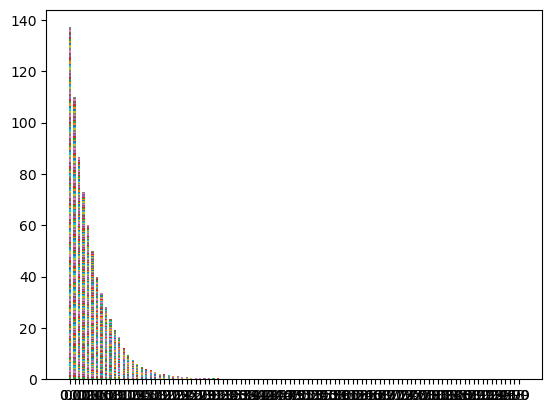

In [176]:
species = list(map(str, tresh_vs_supp.columns.to_list()))
weight_counts = tresh_vs_supp.T.to_dict()
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(tresh_vs_supp.columns))

for boolean, weight_count in weight_counts.items():
    weight_count = list(weight_count.values())
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.show()

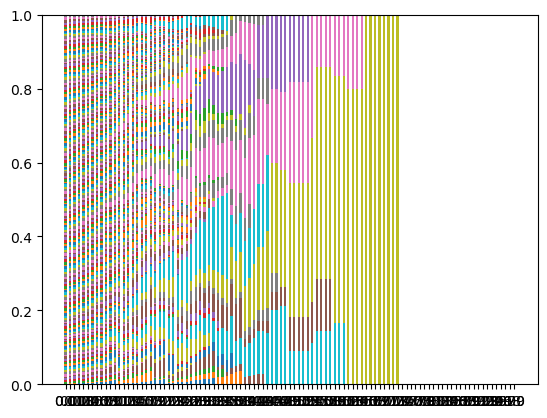

In [177]:
species = list(map(str, tresh_vs_supp_rappart.columns.to_list()))
weight_counts = tresh_vs_supp_rappart.T.to_dict()
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(tresh_vs_supp_rappart.columns))

for boolean, weight_count in weight_counts.items():
    weight_count = list(weight_count.values())
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.show()

On prend ensuite les 5 meilleur PLM (meilleur support) de chaque Treshhold et on regarde a quelle treshhold ils ont été les meilleurs.

In [178]:
five_best_PLMs
five_best_PLMs_tresh = {t : {i : [] for i in tresh_vs_supp_rappart.index.to_list()} for t in tresh_vs_supp_rappart.columns.to_list()}
n =0

for plm in five_best_PLMs:
    tresh =  list(five_best_PLMs_tresh.keys())[n]
    for p in five_best_PLMs_tresh[tresh].keys():
        if p in plm:
            five_best_PLMs_tresh[tresh][p] = 1
        else:
            five_best_PLMs_tresh[tresh][p] = 0
    n += 1


In [179]:
five_best_PLMs_tresh = pd.DataFrame(five_best_PLMs_tresh)
five_best_PLMs_tresh = five_best_PLMs_tresh [five_best_PLMs_tresh.sum(1) != 0]

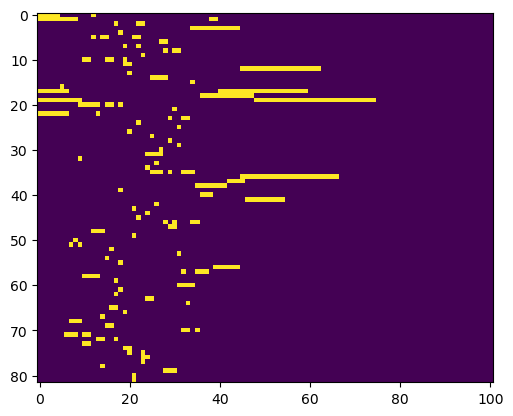

In [180]:
plt.figure()
plt.imshow(five_best_PLMs_tresh)
plt.show()

In [181]:
five_best_PLMs_repart = {i:[] for i in five_best_PLMs_tresh.index}
five_best_PLMs_tresh = five_best_PLMs_tresh == 1

for i in range(len(five_best_PLMs_tresh.index)):
    id = list(five_best_PLMs_tresh.index)[i]
    five_best_PLMs_repart[id] = str(five_best_PLMs_tresh.iloc[i][five_best_PLMs_tresh.iloc[i]].index.to_list())


In [182]:
pd.concat([pd.Series(five_best_PLMs_tresh.sum(1)), pd.Series(five_best_PLMs_repart)], axis=1)

,0,1
WMCAATAATTRW_-317,6,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.12]"
TGTAAAGT_-280,11,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07..."
TAACAAA_-261,3,"[0.17, 0.22, 0.23]"
HDTTAACAGAAWW_-260,11,"[0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41..."
AWTTAAWT_-239,1,[0.18]
...,...,...
AGATCCAA_326,1,[0.23]
HYRGATCYRD_334,1,[0.14]
ATGTCGGYRR_344,3,"[0.28, 0.29, 0.3]"
CTGACY_367,1,[0.21]


#### Pour les expression negative

In [183]:
tresh_result = []
tresh_list = [i/100 for i in range(0,101,1)]

for t in tresh_list:
    tresh_result.append(len(fpgrowth_2(motif_minus_cond_freq, min_support=0.0001, tresh = t, max_length=1)["support"]))

In [184]:
import plotly.express as px

d = {"Treshold" : tresh_list, "number_motifs" : tresh_result}
df = pd.DataFrame(data = d)

fig = px.line(df, x="Treshold", y="number_motifs")
fig.show()

On va regarder plus en détail où se passe la perte de donnée

In [192]:
tresh_vs_supp = pd.DataFrame(np.zeros((178,101)), index=motif_minus_cond_freq.columns, columns=tresh_list)
tresh_list = [i/100 for i in range(0,101,1)]
five_best_PLMs = []
for t in tresh_list:
    res1 = fpgrowth_2(motif_minus_cond_freq, min_support=0.0001, tresh = t, max_length=1).sort_values("support", ascending=True)
    itm_set = list(map(list, res1["itemsets"]))
    for it in range(len(itm_set)):
        itm_set[it] = itm_set[it][0]
    res1.index = itm_set
    for itm in itm_set:
        tresh_vs_supp[t][itm] = res1["support"][itm]
    five_best_PLMs.append(itm_set[:5])

tresh_vs_supp_rappart = tresh_vs_supp / np.sum(tresh_vs_supp)
tresh_vs_supp_rappart = tresh_vs_supp_rappart.fillna(0)

C:\Users\seiko\AppData\Local\Temp\ipykernel_13548\259438524.py:11: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\seiko\AppData\Local\Temp\ipykernel_13548\259438524.py:11: FutureWarning:

ChainedAssignmentError: behaviour will change

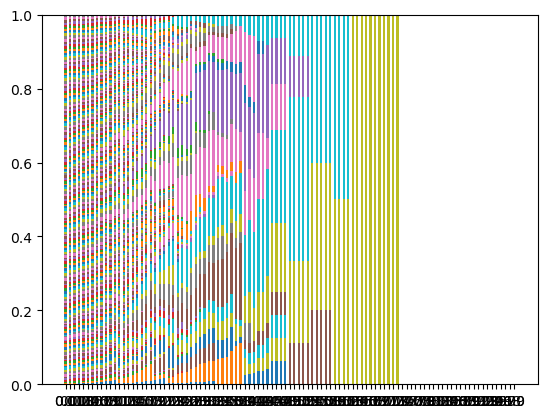

In [193]:
species = list(map(str, tresh_vs_supp_rappart.columns.to_list()))
weight_counts = tresh_vs_supp_rappart.T.to_dict()
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(tresh_vs_supp_rappart.columns))

for boolean, weight_count in weight_counts.items():
    weight_count = list(weight_count.values())
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

plt.show()

In [194]:
five_best_PLMs
five_best_PLMs_tresh = {t : {i : [] for i in tresh_vs_supp_rappart.index.to_list()} for t in tresh_vs_supp_rappart.columns.to_list()}
n =0

for plm in five_best_PLMs:
    tresh =  list(five_best_PLMs_tresh.keys())[n]
    for p in five_best_PLMs_tresh[tresh].keys():
        if p in plm:
            five_best_PLMs_tresh[tresh][p] = 1
        else:
            five_best_PLMs_tresh[tresh][p] = 0
    n += 1


In [195]:
five_best_PLMs_tresh = pd.DataFrame(five_best_PLMs_tresh)
five_best_PLMs_tresh = five_best_PLMs_tresh [five_best_PLMs_tresh.sum(1) != 0]

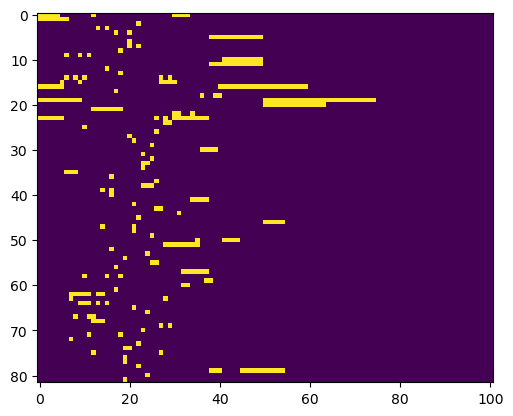

In [196]:
plt.figure()
plt.imshow(five_best_PLMs_tresh)
plt.show()

In [197]:
five_best_PLMs_repart = {i:[] for i in five_best_PLMs_tresh.index}
five_best_PLMs_tresh = five_best_PLMs_tresh == 1

for i in range(len(five_best_PLMs_tresh.index)):
    id = list(five_best_PLMs_tresh.index)[i]
    five_best_PLMs_repart[id] = str(five_best_PLMs_tresh.iloc[i][five_best_PLMs_tresh.iloc[i]].index.to_list())


In [198]:
pd.concat([pd.Series(five_best_PLMs_tresh.sum(1)), pd.Series(five_best_PLMs_repart)], axis=1)

,0,1
WMCAATAATTRW_-317,10,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.12, 0.3, 0.31,..."
TGTAAAGT_-280,7,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]"
AWTTAAWT_-239,1,[0.22]
RTTTTTR_-229,2,"[0.13, 0.15]"
GRWAAW_-212,2,"[0.17, 0.2]"
...,...,...
AACCCA_282,1,[0.19]
SAGATCYRR_295,1,[0.22]
DYCACCGACAHH_312,13,"[0.38, 0.39, 0.4, 0.45, 0.46, 0.47, 0.48, 0.49..."
YAGATCTR_353,1,[0.24]
